# Different metrics (error functions & quality functional)

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(19)

# Regression task

In [16]:
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, mean_absolute_percentage_error, r2_score

In [17]:
# models for comparison
linear_model = Ridge()

cols=['noise', 'MAE', 'MSE', 'MAPE', 'R2_score']
metrics = pd.DataFrame(columns=cols)
metrics

,noise,MAE,MSE,MAPE,R2_score


In [4]:
for noise in np.arange(1, 25, 0.5):
    # data
    x, y = make_regression(n_samples=10000, n_features=500, noise=noise)
    x_train, x_test, y_train, y_test = train_test_split(x, y)

    # training
    linear_model.fit(x_train, y_train)

    # predict
    predicted_linear = linear_model.predict(x_test)

    # score
    linear_scores = pd.DataFrame([[noise,
                                  mean_absolute_error(predicted_linear, y_test),
                                  mean_squared_error(predicted_linear, y_test),
                                  mean_absolute_percentage_error(predicted_linear, y_test),
                                  r2_score(predicted_linear, y_test)]],
                                  columns=cols)
    metrics = pd.concat([metrics, linear_scores])

    # plt.scatter(x_test, y_test)
    # plt.plot(x_test, predicted_forest, c='r')
    # plt.plot(x_test, predicted_linear, c='g')
    # plt.title(f'regression task with noise {noise}')
    # plt.show()

In [5]:
metrics = metrics.set_index('noise')
metrics

,MAE,MSE,MAPE,R2_score
noise,,,,
1.0,0.812665,1.037442,0.029459,0.999968
1.5,1.231914,2.412677,0.049551,0.999932
2.0,1.697691,4.473458,0.091154,0.999887
2.5,2.086208,6.919194,0.113915,0.999775
3.0,2.470930,9.714103,0.087661,0.999712
3.5,2.922931,13.268628,0.151951,0.999285
4.0,3.359260,17.913479,0.087146,0.999522
4.5,3.707706,21.566629,0.139906,0.998882
5.0,4.122625,26.906706,0.126063,0.999089


Text(0.5, 1.0, 'ERRORS vs NOISE LEVEL')

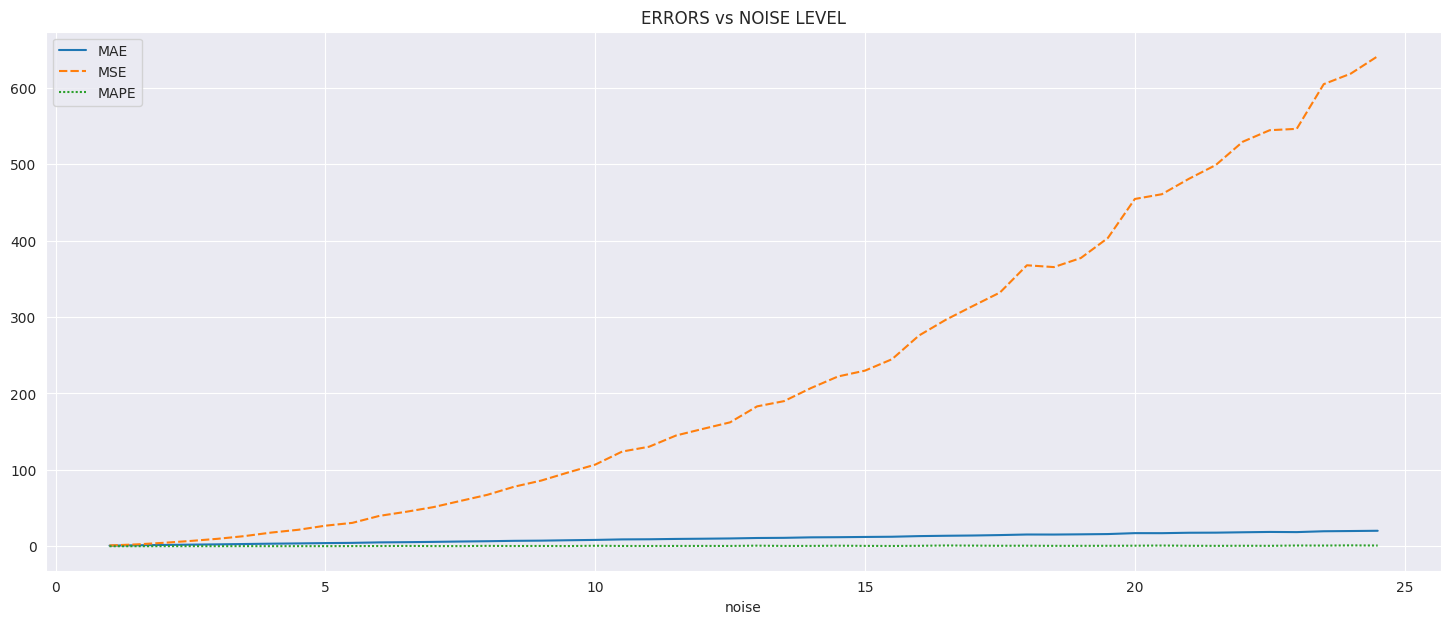

In [6]:
plt.figure(figsize=(18, 7))
sns.lineplot(data=metrics[['MAE', 'MSE', 'MAPE']])
plt.title('ERRORS vs NOISE LEVEL')

<AxesSubplot: xlabel='noise', ylabel='R2_score'>

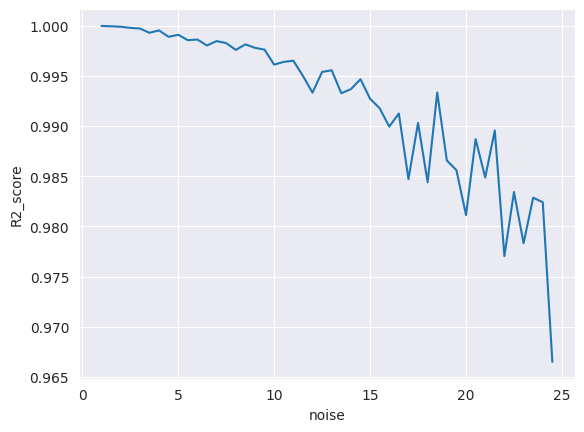

In [7]:
plt.figure(figsize=(13, 5))
sns.lineplot(data=metrics['R2_score'])

## Classification

In [33]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, matthews_corrcoef,\
    precision_score, recall_score, f1_score, balanced_accuracy_score

Number of points related to class 1: 2126
Number of points related to class 0: 4874


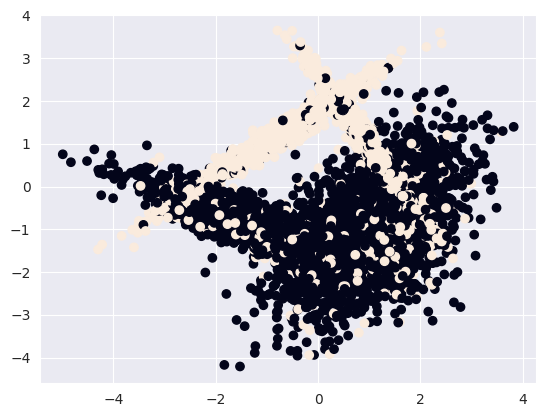

In [25]:
X, y = make_classification(n_samples=7000, n_features=2, n_redundant=0, random_state=19,
                           flip_y=0.2, weights=(0.75,))
print(f'Number of points related to class 1: {len(y[y==1])}')
print(f'Number of points related to class 0: {len(y[y==0])}')

X_train, X_test, y_train, y_test = train_test_split(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y)

In [26]:
model = LogisticRegression()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f'Shape of train: {len(X_train_scaled)}')
print('TRAIN DATA:')
print(f'class 0: {len(y_train[y_train==0])} points')
print(f'class 1: {len(y_train[y_train==1])} points')

Shape of train: 5250
TRAIN DATA:
class 0: 3641 points
class 1: 1609 points


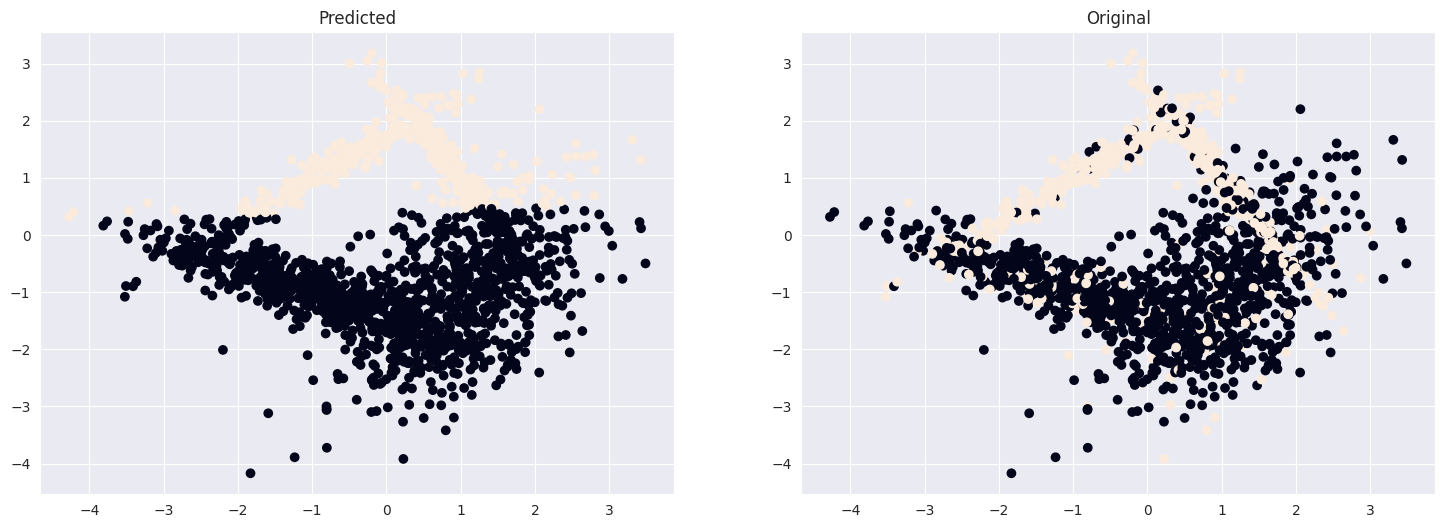

In [29]:
model.fit(X_train_scaled, y_train)
y_predicted = model.predict(X_test_scaled)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
ax1.scatter(X_test[:, 0], X_test[:, 1], c=y_predicted)
ax2.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
ax1.set_title('Predicted')
ax2.set_title('Original')
plt.show()

In [34]:
print(f"Confusion matrix: \n {confusion_matrix(y_test, y_predicted)}\n")
print(f'accuracy = {accuracy_score(y_test, y_predicted)}')
print(f'precision = {precision_score(y_test, y_predicted)}')
print(f'recall = {recall_score(y_test, y_predicted)}')
print(f'F1-score = {f1_score(y_test, y_predicted)}')
print(f"Cohen's Kappa = {cohen_kappa_score(y_test, y_predicted)}")
print(f'Matthews correlation coefficient = {matthews_corrcoef(y_test, y_predicted)}')
print(f'Balanced accuracy = {balanced_accuracy_score(y_test, y_predicted)}')

Confusion matrix: 
 [[1136   97]
 [ 220  297]]

accuracy = 0.8188571428571428
precision = 0.7538071065989848
recall = 0.574468085106383
F1-score = 0.6520307354555435
Cohen's Kappa = 0.532587833044334
Matthews correlation coefficient = 0.5415689756801089
Balanced accuracy = 0.7478990871598419
